# MNIST Handwritten Digit Classification

## Objective
In this project, you will apply three different machine learning models (Logistic Regression, k-Nearest Neighbors, and Decision Trees) to classify handwritten digits from the MNIST dataset. You will compare their performance using appropriate evaluation metrics and tune hyperparameters using cross-validation.

## Dataset
You will use the MNIST dataset, which consists of images of handwritten digits (0-9) represented as 28x28 pixel grayscale images. In sklearn, the fetch_openml('mnist_784') function can be used to load the dataset, where each image is flattened into a 784-dimensional feature vector.

### 1. Train-test split
Split the dataset into training and testing sets (e.g., 70% train, 30% test).

### 2. Train and Evaluate Models 
    - Implement and train the following classifiers using sklearn:
         Logistic Regression (LogisticRegression)
         k-Nearest Neighbors (KNeighborsClassifier)
         Decision Tree (DecisionTreeClassifier)
    - For each model, experiment with different hyperparameters using cross-validation
        Logistic Regression: Regularization strength (C).
        knn: Number of neighbors (n_neighbors).
        Decision Tree: Maximum depth (max_depth).
    - Identify the best hyperparameter values and retrain the models accordingly.
    - Report accuracy, confusion matrices, and other relevant metrics (e.g., classification_report).
 
### 3. Compare and Interpret Results
    - Compare model performance based on accuracy and other metrics.
    - Discuss the strengths and weaknesses of each model in this classification task.
    - Reflect on how hyperparameter tuning impacts performance.

### Bonus (Optional)
Visualize a few misclassified images and analyze why the model may have misclassified them.
Experiment with different train-test splits to see how they impact model performance.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, balanced_accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [2]:
mnist = fetch_openml('mnist_784', return_X_y=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)


In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

### Visualizing a sample

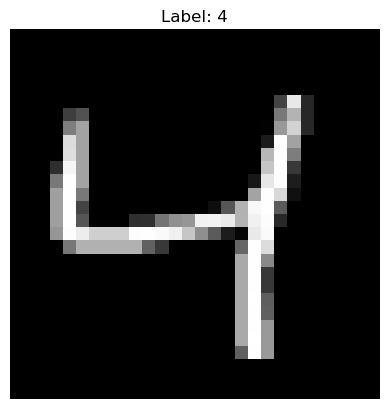

In [5]:
index = 2
image = X.iloc[index].values.reshape(28, 28)  # Reshape to 28x28 image
label = y.iloc[index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [19]:
mnist = fetch_openml('mnist_784', return_X_y=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=290, stratify=y
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [29]:
def show_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"{model_name} Results:")
    print(f"Accuracy: {acc}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Balanced Accuracy: {balanced_acc}")

    report_df = pd.DataFrame(report).transpose()


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    return report_df

In [30]:
#Logistic Regression
def log_reg(X_train, X_test, y_train, y_test, c_range):
    best_acc = 0
    best_c = None
    best_model = None

    for c in c_range:
        model = OneVsRestClassifier(LogisticRegression(C=c, max_iter=1000))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_c = c
            best_model = model

    print(f"Best Logistic Regression C: {best_c}")
    return show_model(best_model, X_test, y_test, "Logistic Regression")



Best Logistic Regression C: 0.02

Logistic Regression Results:
Accuracy: 0.9186666666666666
F1 Score: 0.9183925631457269
Recall: 0.9186666666666666
Balanced Accuracy: 0.9176128913839676


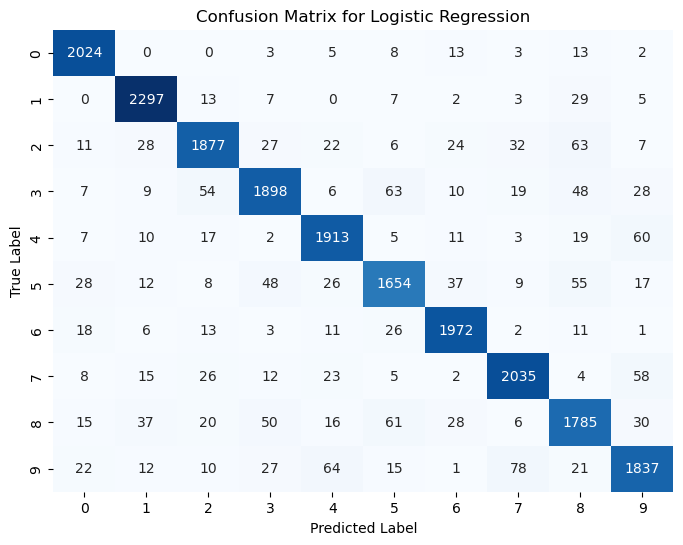

In [33]:
c_range = np.linspace(0.01, 0.03, 100) 
log_reg_report = log_reg(X_train_sc, X_test_sc, y_train, y_test, c_range)

In [36]:
log_reg_report

,precision,recall,f1-score,support
0,0.945794,0.977306,0.961292,2071.000000
1,0.946826,0.972069,0.959282,2363.000000
2,0.921001,0.895088,0.907860,2097.000000
3,0.913818,0.886088,0.899739,2142.000000
4,0.917066,0.934538,0.925720,2047.000000
5,0.894054,0.873284,0.883547,1894.000000
6,0.939048,0.955889,0.947394,2063.000000
7,0.929224,0.930073,0.929648,2188.000000
8,0.871582,0.871582,0.871582,2048.000000
9,0.898289,0.880211,0.889158,2087.000000


In [37]:
def knn(X_train, X_test, y_train, y_test, n_range):
    best_acc = 0
    best_n = None
    best_model = None

    for n in n_range:
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_n = n
            best_model = model

    print(f"Best k-NN Neighbors: {best_n}")
    return show_model(best_model, X_test, y_test, "k-Nearest Neighbors")


Best k-NN Neighbors: 3

k-Nearest Neighbors Results:
Accuracy: 0.9460952380952381
F1 Score: 0.945957714505695
Recall: 0.9460952380952381
Balanced Accuracy: 0.9453457391520577


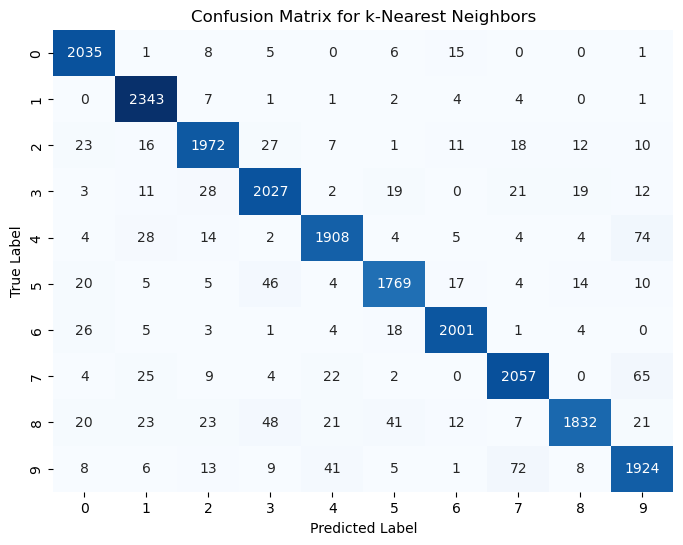

In [42]:
n_range = [3, 5, 7, 9, 11, 13, 15] 
knn_report = knn(X_train_sc, X_test_sc, y_train, y_test, n_range)

In [43]:
knn_report

,precision,recall,f1-score,support
0,0.949603,0.982617,0.965828,2071.000000
1,0.951279,0.991536,0.970990,2363.000000
2,0.947166,0.940391,0.943766,2097.000000
3,0.934101,0.946312,0.940167,2142.000000
4,0.949254,0.932096,0.940596,2047.000000
5,0.947509,0.934002,0.940707,1894.000000
6,0.968538,0.969947,0.969242,2063.000000
7,0.940128,0.940128,0.940128,2188.000000
8,0.967776,0.894531,0.929713,2048.000000
9,0.908404,0.921897,0.915101,2087.000000


In [45]:
def tree(X_train, X_test, y_train, y_test, d_range):
    best_acc = 0
    best_depth = None
    best_model = None

    for d in d_range:
        model = DecisionTreeClassifier(max_depth=d)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_depth = d
            best_model = model

    print(f"Best Decision Tree Depth: {best_depth}")
    return show_model(best_model, X_test, y_test, "Decision Tree")

Best Decision Tree Depth: 15

Decision Tree Results:
Accuracy: 0.8739047619047619
F1 Score: 0.8735928326750511
Recall: 0.8739047619047619
Balanced Accuracy: 0.8720710959950552


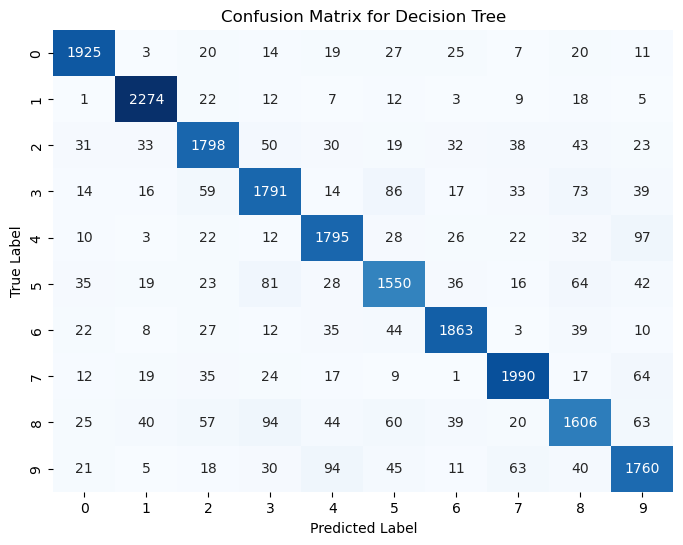

In [48]:
d_range = [3, 5, 10, 15, 20, 25]
tree_report = tree(X_train, X_test, y_train, y_test, d_range)

In [49]:
tree_report

,precision,recall,f1-score,support
0,0.918416,0.929503,0.923926,2071.000000
1,0.939669,0.962336,0.950868,2363.000000
2,0.864008,0.857415,0.860699,2097.000000
3,0.844811,0.836134,0.840450,2142.000000
4,0.861738,0.876893,0.869249,2047.000000
5,0.824468,0.818374,0.821410,1894.000000
6,0.907453,0.903054,0.905248,2063.000000
7,0.904134,0.909506,0.906812,2188.000000
8,0.822746,0.784180,0.803000,2048.000000
9,0.832545,0.843316,0.837896,2087.000000


# Conclusion

I compared each of the models using their accuracy, recall, F1 score, and confusion matrices. Out of the three, KNN with k=3 did the best, with the highest accuracy (94.6%), F1 score, and recall. Logistic Regression came in second with consistent and good results, while the Decision Tree (with a max depth of 15) had the lowest accuracy (87.4%) and made more mistakes. Looking at the confusion matrices, all models were very good at predicting digits like 1, 0, and 7, which have a bit more distinct shapes. However, digits like 3, 5, 8, and 9 were harder for all models and often got mixed up with each other. For example, the number 8 was often confused with 3, 5, or 9. Hyperparameter tuning had a noticeable impact on performance for each model. For Logistic Regression, adjusting the regularization strength (C) helped prevent overfitting and improved generalization, with C=0.02 giving the best results. In KNN, using k=3 gave the most accurate predictions, likely because it focused on the closest and most similar examples, rather than including more distant neighbors that could introduce more different classifications. For the Decision Tree, it had the most trouble and made the most errors across almost all digits; tuning the maximum depth to 15 helped, but the model still didn’t perform as well as the others, suggesting that even with tuning, basic decision trees might not be the best choice for this kind of data and classification. Overall, tuning helped each model reach its best possible performance and showed how important it is to find the right hyperparameters with KNN performing the best.